##Objective: Process the biased.full data set to generate examples and labels which will lead to model training (Naive Bayes, GPT-2)

##Written by: Etienne Ndedi

### As the source data set has no explicit target variable, the column representing the the biased text will be used to create a label value of 1 while the column representing the improvement of the biased text will be used to generate a label of '0'

###Note: One alternative is to use the Biased_full dataset in the code and do the processing below.


In [ ]:
import pandas as pd
import numpy as np
import csv
from sklearn import preprocessing
import spacy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Read the dataset in
df_inputs = pd.read_csv('biased.full', sep='\t', names=["id", "src_tok", "tgt_tok", "src_raw", "tgt_raw", "src_POS_tags", "tgt_parse_tags"], on_bad_lines='skip')
print(f"Number of rows in DataFrame: {len(df_inputs)}")

df_inputs.head()

Number of rows in DataFrame: 181473


,id,src_tok,tgt_tok,src_raw,tgt_raw,src_POS_tags,tgt_parse_tags
0,258378316,"during the campaign , controversy erupted over...","during the campaign , some pointed out alleged...","during the campaign, controversy erupted over ...","during the campaign, some pointed out alleged ...",ADP DET NOUN PUNCT NOUN VERB ADP VERB NOUN ADP...,prep det pobj punct nsubj ROOT prep amod pobj ...
1,486527143,nic ##aea was con ##vo ##ked by the emperor co...,nic ##aea was con ##vo ##ked by the emperor co...,nicaea was convoked by the emperor constantine...,nicaea was convoked by the emperor constantine...,NOUN NOUN VERB VERB VERB VERB ADP DET NOUN NOU...,nsubjpass nsubjpass auxpass ROOT ROOT ROOT age...
2,54024499,it was rather unfortunate that he ve ##hem ##e...,he ve ##hem ##ently opposed the bud ##ding ind...,it was rather unfortunate that he vehemently o...,he vehemently opposed the budding indian scien...,PRON VERB ADV ADJ ADP PRON ADV ADV ADV VERB DE...,nsubj ROOT advmod acomp mark nsubj advmod advm...
3,160186886,dennis the menace is an american animated seri...,dennis the menace is an american animated seri...,dennis the menace is an american animated seri...,dennis the menace is an american animated seri...,VERB DET NOUN VERB DET ADJ VERB NOUN VERB ADP ...,csubj det dobj ROOT det amod amod attr acl age...
4,8797183,"today , on large farms , motorcycles , dogs or...","today , on large farms , motorcycles , dogs or...","today, on large farms, motorcycles, dogs or me...","today, on large farms, motorcycles, dogs or pe...",NOUN PUNCT ADP ADJ NOUN PUNCT NOUN PUNCT NOUN ...,npadvmod punct prep amod pobj punct conj punct...


In [ ]:
#Create a data set that consists of two columns, df_inputs['plots'] a concatenation of df_inputs['src_raw'] and df_inputs['tgt_raw']
# and labels column with value 1 if df_inputs['src_raw'] and 0 if df_inputs['tgt_raw']. The resulting data set
# df_new is twice the length of df_inputs and has only two columns plots and labels.
df_new = pd.DataFrame(columns=['plots', 'labels'])

#Create two data sets, one with df_inputs['src_raw'] another with df_inputs['tgt_raw']
df_src = df_inputs['src_raw']
df_tgt = df_inputs['tgt_raw']

#rename df_tgt to 'example'
df_tgt = df_tgt.rename('example') # Changed 'columns' to 'name' for Series
#create a variable df_tgt['label'] with value 0
df_tgt = df_tgt.to_frame() # Convert Series to DataFrame to add a new column
df_tgt['label'] = 0
#rename df_src to 'example'
df_src = df_src.rename('example') # Changed 'columns' to 'name' for Series
#create a variable df_src['label'] with value 1
df_src = df_src.to_frame() # Convert Series to DataFrame to add a new column
df_src['label'] = 1
# Concatenate df_src and df_tgt to have a larger data set that we will shuffle
# This data set bias_unbias will have both the positive and negative labels
bias_unbias = pd.concat([df_src, df_tgt])
# Shuffle the data set
bias_unbias = bias_unbias.sample(frac=1).reset_index(drop=True)

# Print the number of rows in the DataFrame
print(f"Number of rows in DataFrame: {len(bias_unbias)}")

# Print the number of columns in the DataFrame
print(f"Number of columns in DataFrame: {len(bias_unbias.columns)}")

# Print the counts of the label column
print(bias_unbias['label'].value_counts())

# Print the first few rows of the DataFrame
bias_unbias.head()

Number of rows in DataFrame: 362946
Number of columns in DataFrame: 2
label
0    181473
1    181473
Name: count, dtype: int64


,example,label
0,"in this formulation, warhol's quote has been t...",0
1,"his nickname was the stuff of legend, but in l...",1
2,an abrahamic religion (also referred to as des...,0
3,it was introduced to north america around 1874...,0
4,fat old sun is perhaps best described as a pas...,0


Now we could either take the whole data set or just a portion of it. At this juncture there are no balancing issues as the plots columns and labels came from
two columns sourced from the same subset named biased.full

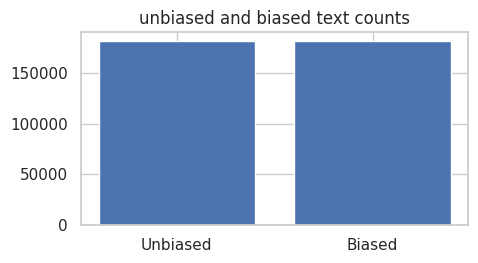

In [ ]:
label_names = ['Unbiased', 'Biased']
labels_names = bias_unbias['label'].value_counts()
title = 'unbiased and biased text counts'
plt.figure(figsize=(5,2.5))
plt.title(title)
plt.bar(label_names, labels_names)
plt.show()

A few values    

In [ ]:
bias_unbias[:10]

,example,label
0,"in this formulation, warhol's quote has been t...",0
1,"his nickname was the stuff of legend, but in l...",1
2,an abrahamic religion (also referred to as des...,0
3,it was introduced to north america around 1874...,0
4,fat old sun is perhaps best described as a pas...,0
5,"in june of 2015, kotsko joked in a tweet that ...",0
6,"another primary reason though, is an acknowled...",1
7,those concerned about these events believe tha...,0
8,soup is usually a liquid food that is made by ...,0
9,world class music concerts in various configur...,1


We could do the text split now. We could ultimately reduce the size of our dataset. However, each text entry is not big enough to cause concern about the computing resources. Below is just an example of a split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(
           bias_unbias['example'], bias_unbias['label'], test_size = 0.2, random_state = 1)

print(len(train_data), len(val_data))
print(len(train_labels), len(val_labels))

290356 72590
290356 72590


WE CAN NOW DOWNLOAD THE SUBSET PRIOR TO THE SPLIT TO SERVE AS OUR SOURCE DATA FOR THE FOLLOWING MODELS:

- NAIVE BAYES
- GPT2 CLASSIFICATION MODEL

Now that we have our training and testing sets we now need to use a TOKENIZER(spacy in this case).

- We are going to first list a few pipe components; since we do not need them eliminate them. There should be no pipeline components

- Tokenize to lead to a vector representation of our text inputs